<a href="https://colab.research.google.com/github/winterForestStump/thesis/blob/main/notebooks/words_count_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
import pandas as pd

def count_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        return len(words)

def count_words_in_files(directory):
    word_counts = {}
    for file_name in os.listdir(directory):
      file_path = os.path.join(directory, file_name)
      with open(file_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
        text = data['content']  # Assuming JSON has text values
        words = text.split()
        word_counts[file_name] = len(words)
    return word_counts

directory = '/content/drive/MyDrive/Thesis/FinanceBench'
word_counts = count_words_in_files(directory)

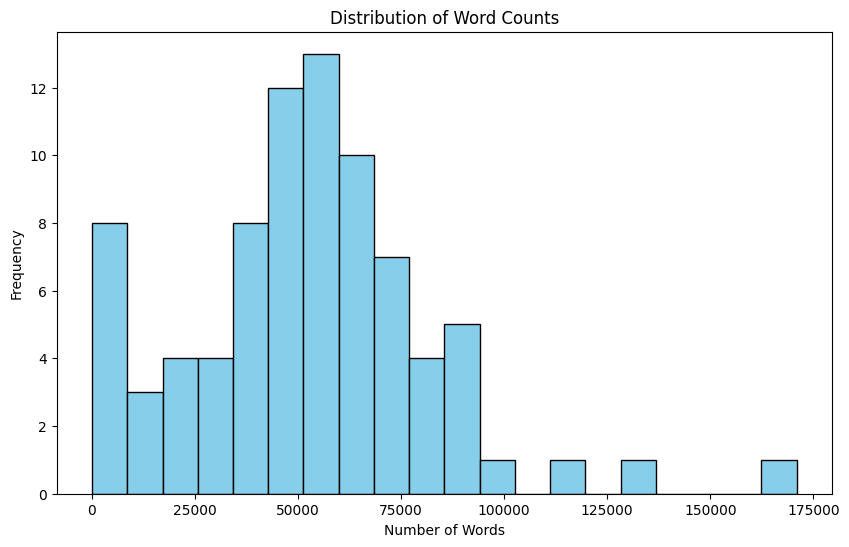

In [3]:
import matplotlib.pyplot as plt

def plot_histogram(word_counts):
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts.values(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Distribution of Word Counts')
    plt.grid(False)
    plt.show()

plot_histogram(word_counts)


In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

def get_most_common_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        text = data['content']
        words = nltk.word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        word_freq = Counter(filtered_words)
        return word_freq.most_common(10)  # Change 10 to the number of top words you want

file_path = '/content/drive/MyDrive/Thesis/FinanceBench/1748790_10K_2023_0001748790-23-000030.json'
top_words = get_most_common_words(file_path)
print(top_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('company', 719), ('million', 663), ('net', 617), ('june', 535), ('assets', 458), ('fiscal', 456), ('year', 449), ('income', 439), ('financial', 405), ('amcor', 350)]


In [ ]:
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

def get_most_common_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        text = data['content']
        words = nltk.word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        word_freq = Counter(filtered_words)
        return word_freq.most_common(10)  # Change 10 to the number of top words you want

def get_top_words_in_directory(directory):
    top_words_per_file = {}
    for file_name in os.listdir(directory):
        if file_name.endswith('.json'):
            file_path = os.path.join(directory, file_name)
            top_words = get_most_common_words(file_path)
            top_words_per_file[file_name] = top_words
    return top_words_per_file

directory = '/content/drive/MyDrive/Thesis/FinanceBench'
top_words_per_file = get_top_words_in_directory(directory)
for file_name, top_words in top_words_per_file.items():
    print(f"Top words in {file_name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words in 1410636_10K_2020_0001410636-21-000101.json:
water: 870
company: 850
companys: 498
million: 376
may: 365
december: 316
assets: 314
financial: 301
american: 266
rate: 244

Top words in 1018724_10K_2017_0001018724-18-000005.json:
tax: 292
cash: 212
december: 202
net: 201
million: 190
sales: 175
may: 167
income: 166
operating: 157
financial: 141

Top words in 1018724_10K_2019_0001018724-20-000004.json:
cash: 234
tax: 226
december: 190
net: 177
income: 169
sales: 162
operating: 154
billion: 145
financial: 144
may: 136

Top words in 1748790_10Q_2023_0001748790-23-000021.json:
net: 223
march: 220
million: 195
ended: 181
months: 171
company: 131
income: 129
nine: 103
interest: 100
assets: 85

Top words in 104169_10K_2018_0000104169-18-000028.json:
company: 459
fiscal: 382
income: 256
january: 252
net: 251
financial: 242
walmart: 232
tax: 222
sales: 211
cash: 197

Top words in 1403568_10K_2023_0001558370-23-004581.json:
beauty: 242
fiscal: 198
january: 197
financial: 176
stores: 16